# Section 4.6 — Generalized linear models

This notebook contains the code examples from [Section 4.6 Generalized linear models]() from the **No Bullshit Guide to Statistics**.

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
from plot_helpers import RCPARAMS
# RCPARAMS.update({'figure.figsize': (10, 3)})   # good for screen
RCPARAMS.update({'figure.figsize': (5, 1.6)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# High-resolution please
%config InlineBackend.figure_format = 'retina'

# Where to store figures
DESTDIR = "figures/lm/generalized"

<Figure size 640x480 with 0 Axes>

In [3]:
# set random seed for repeatability
np.random.seed(42)

## Logistic regression

cdf(x) = 1/(1 + exp(-x))


$$
\Lambda\left(x^{\prime}\beta\right)=
                  \text{Prob}\left(Y=1|x\right)=
                  \frac{e^{x^{\prime}\beta}}{1+e^{x^{\prime}\beta}}
$$


PDF
$$ 
\lambda\left(x^{\prime}\beta\right)=\frac{e^{-x^{\prime}\beta}}{\left(1+e^{-x^{\prime}\beta}\right)^{2}}
$$


pdf(x) = np.exp(-X)/(1+np.exp(-X))**2

In [50]:
from scipy.special import logit
from scipy.special import expit


expit(-1), logit(0.268941)

(0.2689414213699951, -1.0000021431568107)

Here's a Python code example to generate a synthetic dataset suitable for teaching logistic regression. The dataset will have an outcome variable (`Pass/Fail`) and four predictors (`Study Hours`, `Attendance`, `Previous Grades`, and `Sleep Hours`).

In [4]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate predictor variables
study_hours = np.random.normal(loc=5, scale=2, size=n_samples)  # Study hours per week
attendance = np.random.normal(loc=75, scale=10, size=n_samples)  # Attendance percentage
previous_grades = np.random.normal(loc=70, scale=15, size=n_samples)  # Previous grades percentage
sleep_hours = np.random.normal(loc=7, scale=1.5, size=n_samples)  # Sleep hours per night

# Normalize variables to make them suitable for logistic regression
study_hours = (study_hours - np.mean(study_hours)) / np.std(study_hours)
attendance = (attendance - np.mean(attendance)) / np.std(attendance)
previous_grades = (previous_grades - np.mean(previous_grades)) / np.std(previous_grades)
sleep_hours = (sleep_hours - np.mean(sleep_hours)) / np.std(sleep_hours)

# Define logistic regression coefficients
coefficients = np.array([1.5, 1.2, 2.0, -1.0])
intercept = -0.5

# Linear combination of inputs
linear_combination = (coefficients[0] * study_hours +
                      coefficients[1] * attendance +
                      coefficients[2] * previous_grades +
                      coefficients[3] * sleep_hours +
                      intercept)

# Apply the logistic function to get probabilities
probabilities = 1 / (1 + np.exp(-linear_combination))

# Generate binary outcomes (Pass/Fail)
pass_fail = np.random.binomial(1, probabilities)

# Create a DataFrame
data = pd.DataFrame({
    'Study_Hours': study_hours,
    'Attendance': attendance,
    'Previous_Grades': previous_grades,
    'Sleep_Hours': sleep_hours,
    'Pass_Fail': pass_fail
})

# Display the first few rows of the dataset
print(data.head())

# Save the dataset to a CSV file
data.to_csv('synthetic_student_data.csv', index=False)

   Study_Hours  Attendance  Previous_Grades  Sleep_Hours  Pass_Fail
0     0.487759    1.332576        -0.692816    -1.840107          1
1    -0.161022    0.856405        -0.152959    -0.819843          1
2     0.642015   -0.011240        -0.812090    -0.384647          1
3     1.536382   -0.719965        -0.319235     1.856976          0
4    -0.258995    0.629303        -1.932372     0.560356          0


This code generates a synthetic dataset with 1000 samples. The predictors are:

- `Study_Hours`: Normally distributed around 5 hours per week.
- `Attendance`: Normally distributed around 75% attendance.
- `Previous_Grades`: Normally distributed around 70% grades.
- `Sleep_Hours`: Normally distributed around 7 hours per night.

These predictors are normalized before creating the outcome variable (`Pass_Fail`). The logistic regression model is defined by specific coefficients and an intercept, and the probabilities are computed using the logistic function. The outcome is generated using these probabilities. Finally, the dataset is saved to a CSV file and printed for inspection.

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the synthetic dataset
data = pd.read_csv('synthetic_student_data.csv')

# Fit the logistic regression model using statsmodels formula API
formula = 'Pass_Fail ~ Study_Hours + Attendance + Previous_Grades + Sleep_Hours'
logit_model = smf.logit(formula=formula, data=data)
result = logit_model.fit()

# Print the summary of the logistic regression model
print("\nLogistic Regression Model Summary:")
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.370875
         Iterations 7

Logistic Regression Model Summary:
                           Logit Regression Results                           
Dep. Variable:              Pass_Fail   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            4
Date:                Mon, 27 May 2024   Pseudo R-squ.:                  0.4587
Time:                        14:47:42   Log-Likelihood:                -370.88
converged:                       True   LL-Null:                       -685.19
Covariance Type:            nonrobust   LLR p-value:                9.871e-135
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.4893      0.094     -5.192      0.000   

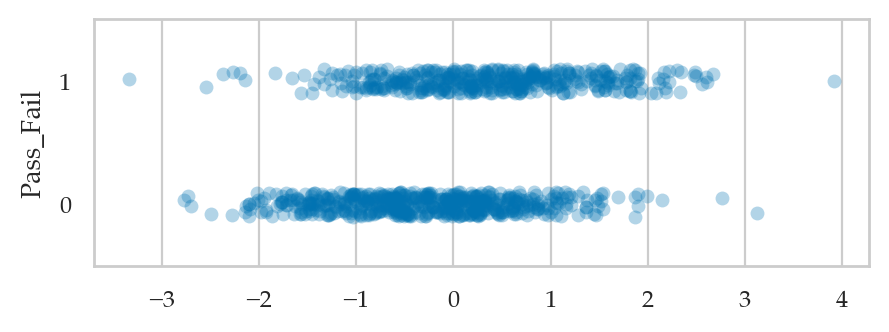

In [6]:
# np.mean(study_hours)) / np.std(study_hours)

sns.stripplot(data=data, x=study_hours, y="Pass_Fail", alpha=0.3, orient="h", order=[1,0]);

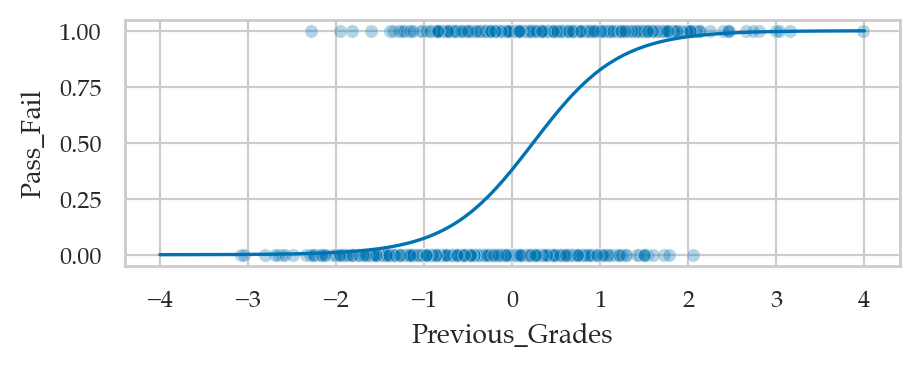

In [7]:
prev_grades_space = np.linspace(-4,4,200)
zeros_space = np.zeros(200)
preds = result.predict({"Previous_Grades": prev_grades_space,
                        "Study_Hours":zeros_space, 
                        "Attendance":zeros_space,
                        "Sleep_Hours":zeros_space})

ax = sns.scatterplot(data=data, x="Previous_Grades", y="Pass_Fail", alpha=0.3)
sns.lineplot(x=prev_grades_space, y=preds, ax=ax);

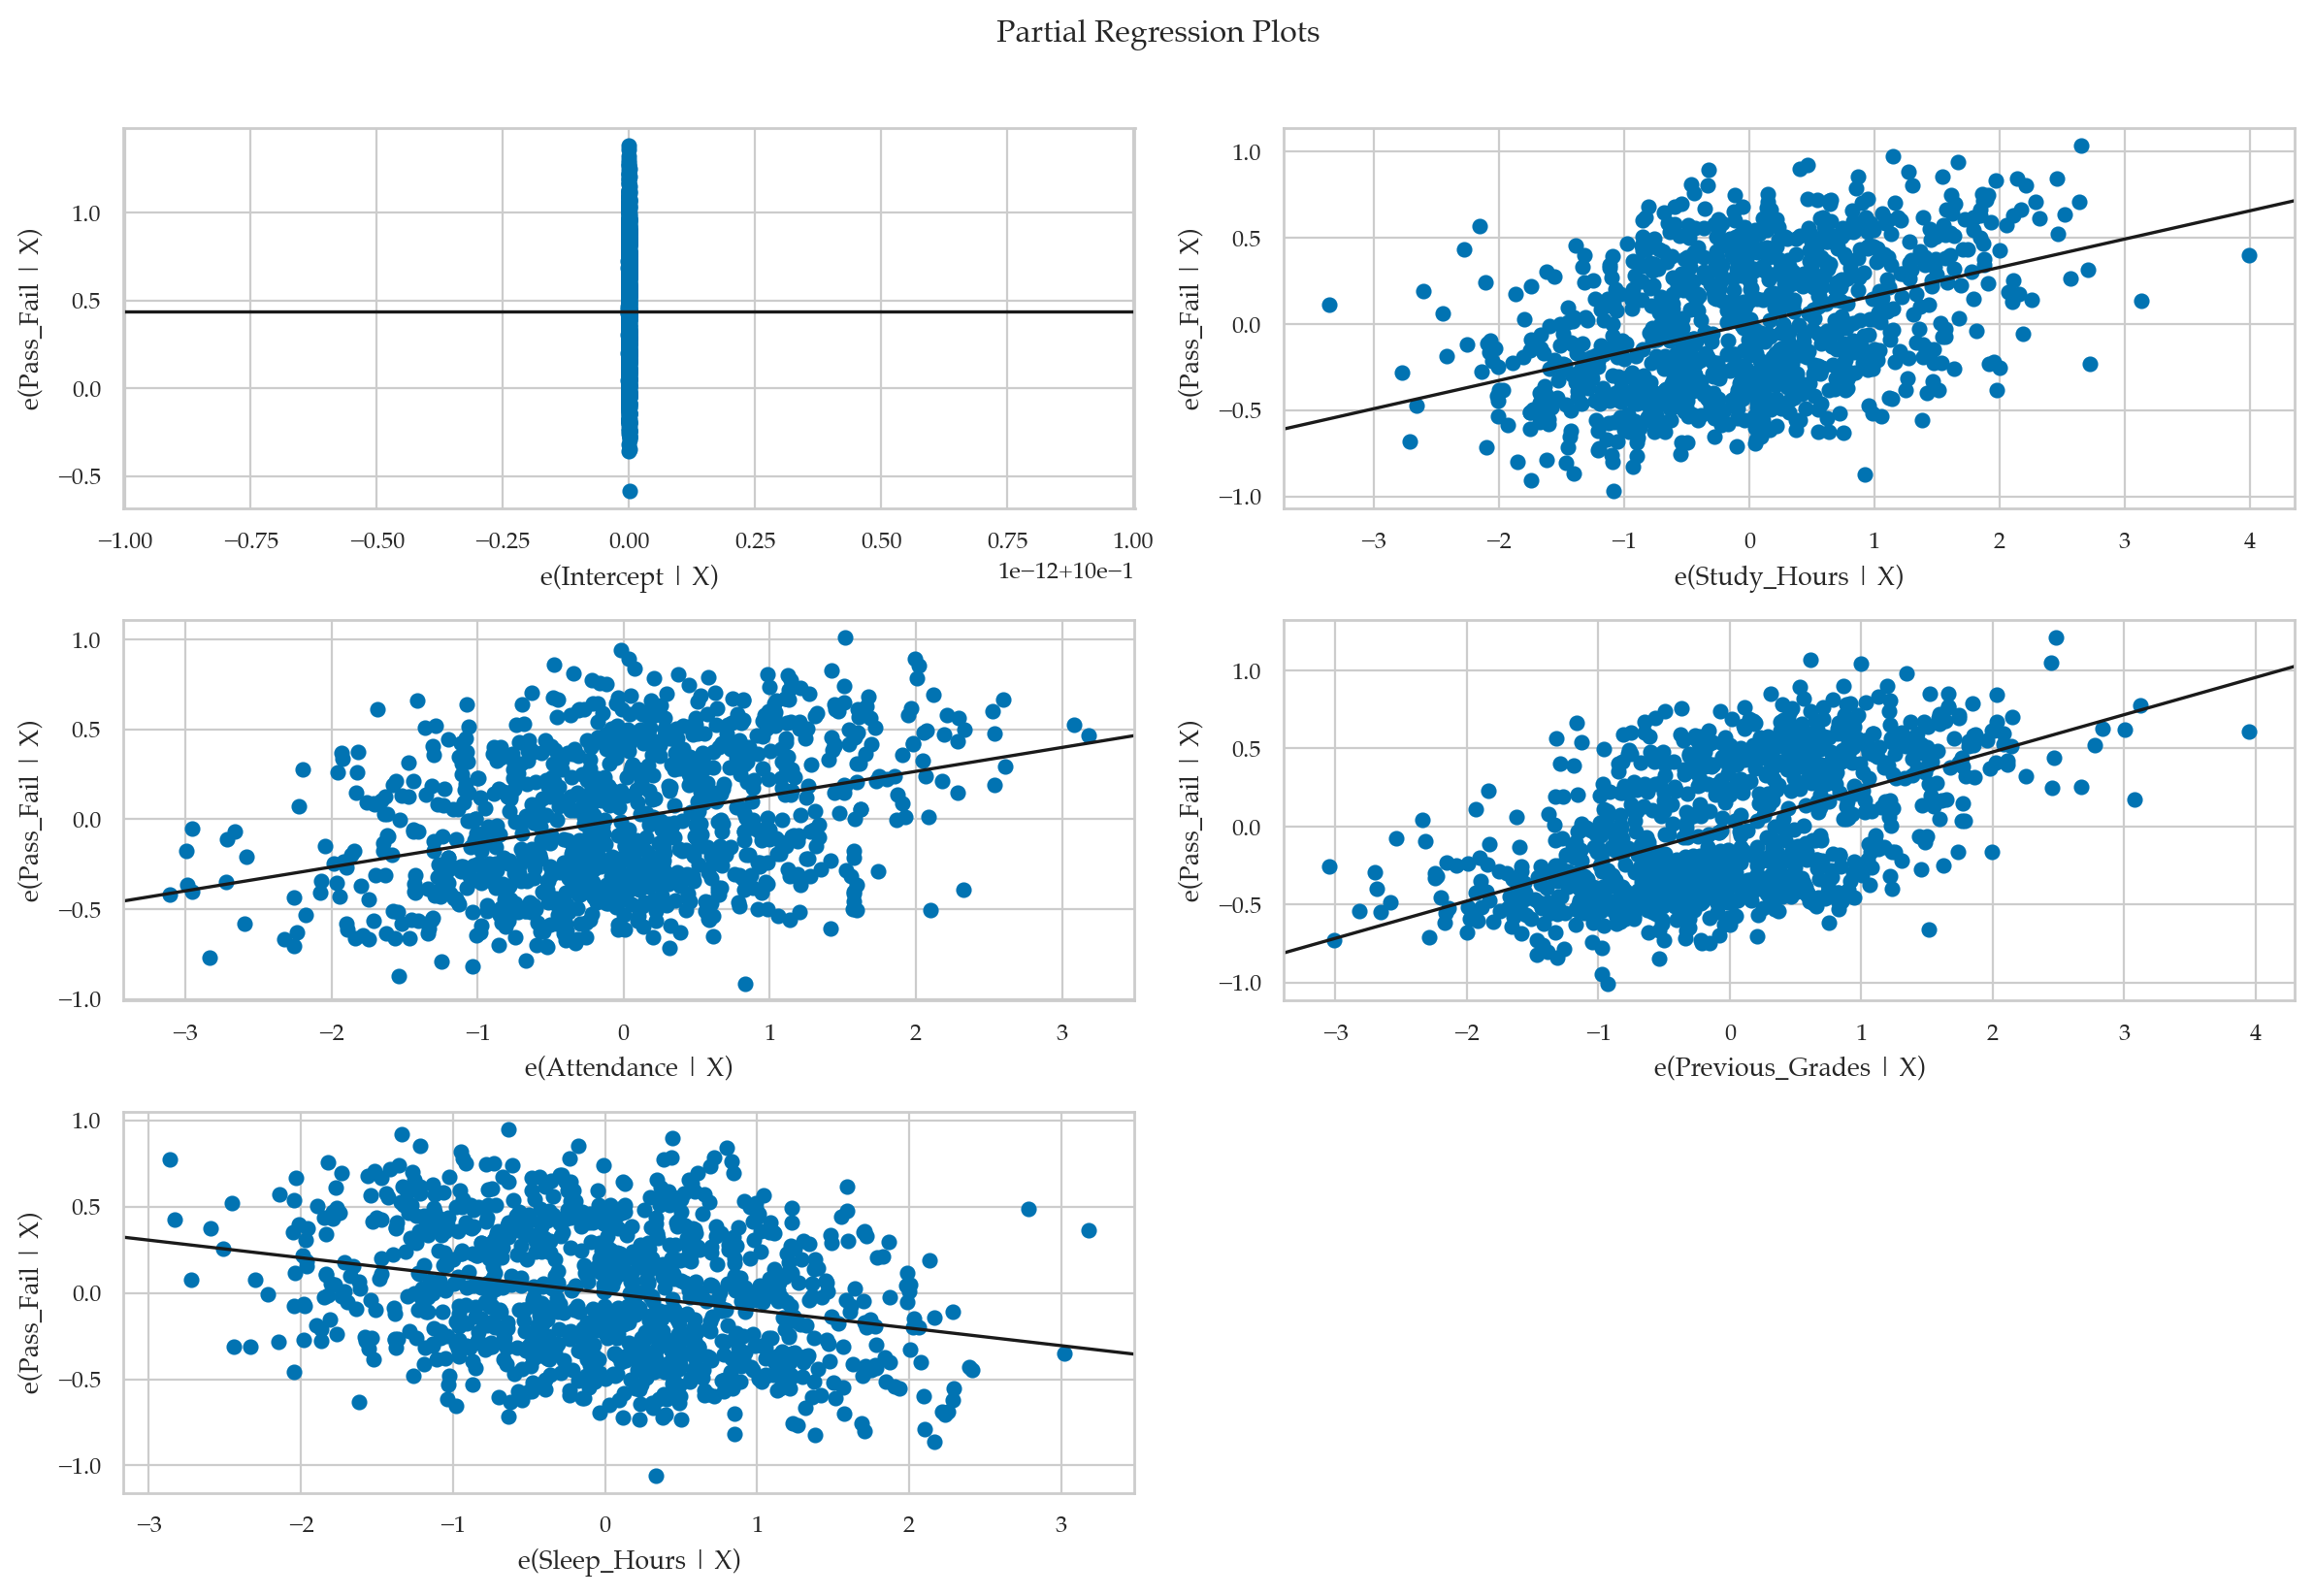

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import plot_partregress_grid


# Create partial regression plots
fig = plt.figure(figsize=(12, 8))
plot_partregress_grid(result, fig=fig)
plt.suptitle('Partial Regression Plots', y=1.02)
plt.show()

## Poisson regression

In [9]:
import numpy as np
import pandas as pd
from scipy.stats import norm, poisson

# Set the random seed for reproducibility
np.random.seed(42)

# Number of observations
n = 1000

# Generate predictors
disk_age = norm.rvs(loc=5, scale=2, size=n)  # Disk age in years
temperature = norm.rvs(loc=35, scale=5, size=n)  # Temperature in Celsius
read_write_ops = norm.rvs(loc=200, scale=50, size=n)  # Number of read/write operations (in millions)

# Coefficients for the predictors
beta_0 = 1.5  # Intercept
beta_1 = 0.3  # Coefficient for disk age
beta_2 = 0.1  # Coefficient for temperature
beta_3 = 0.02  # Coefficient for read/write operations

# Linear predictor
linear_predictor = beta_0 + beta_1 * disk_age + beta_2 * temperature + beta_3 * read_write_ops

# Apply exponential function to get the Poisson rate parameter
lambda_ = np.exp(linear_predictor)

# Generate the outcome variable (number of hard disk failures) using the Poisson distribution
hard_disk_failures = poisson.rvs(mu=lambda_)

# Create a DataFrame
df = pd.DataFrame({
    'disk_age': disk_age,
    'temperature': temperature,
    'read_write_ops': read_write_ops,
    'hard_disk_failures': hard_disk_failures
})

# Display the first few rows of the DataFrame
print(df.head())

# Save the dataset to a CSV file
df.to_csv('synthetic_hard_disk_failures.csv', index=False)


   disk_age  temperature  read_write_ops  hard_disk_failures
0  5.993428    41.996777      166.241086               50094
1  4.723471    39.623168      192.774066               45444
2  6.295377    35.298152      160.379004               25074
3  8.046060    31.765316      184.601924               47980
4  4.531693    38.491117      105.319267                6673


In [10]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the synthetic dataset is already created and loaded into df

# Fit the Poisson regression model using the formula API
poisson_model = smf.poisson('hard_disk_failures ~ disk_age + temperature + read_write_ops', data=df).fit()

# Print the model summary
print(poisson_model.summary())

# Predict the number of hard disk failures
df['predicted_failures'] = poisson_model.predict(df)

Optimization terminated successfully.
         Current function value: 6.690405
         Iterations 7
                          Poisson Regression Results                          
Dep. Variable:     hard_disk_failures   No. Observations:                 1000
Model:                        Poisson   Df Residuals:                      996
Method:                           MLE   Df Model:                            3
Date:                Mon, 27 May 2024   Pseudo R-squ.:                  0.9999
Time:                        14:47:45   Log-Likelihood:                -6690.4
converged:                       True   LL-Null:                   -6.5522e+07
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.4992      0.001   1323.131      0.000       1.497       1.501
disk_age         

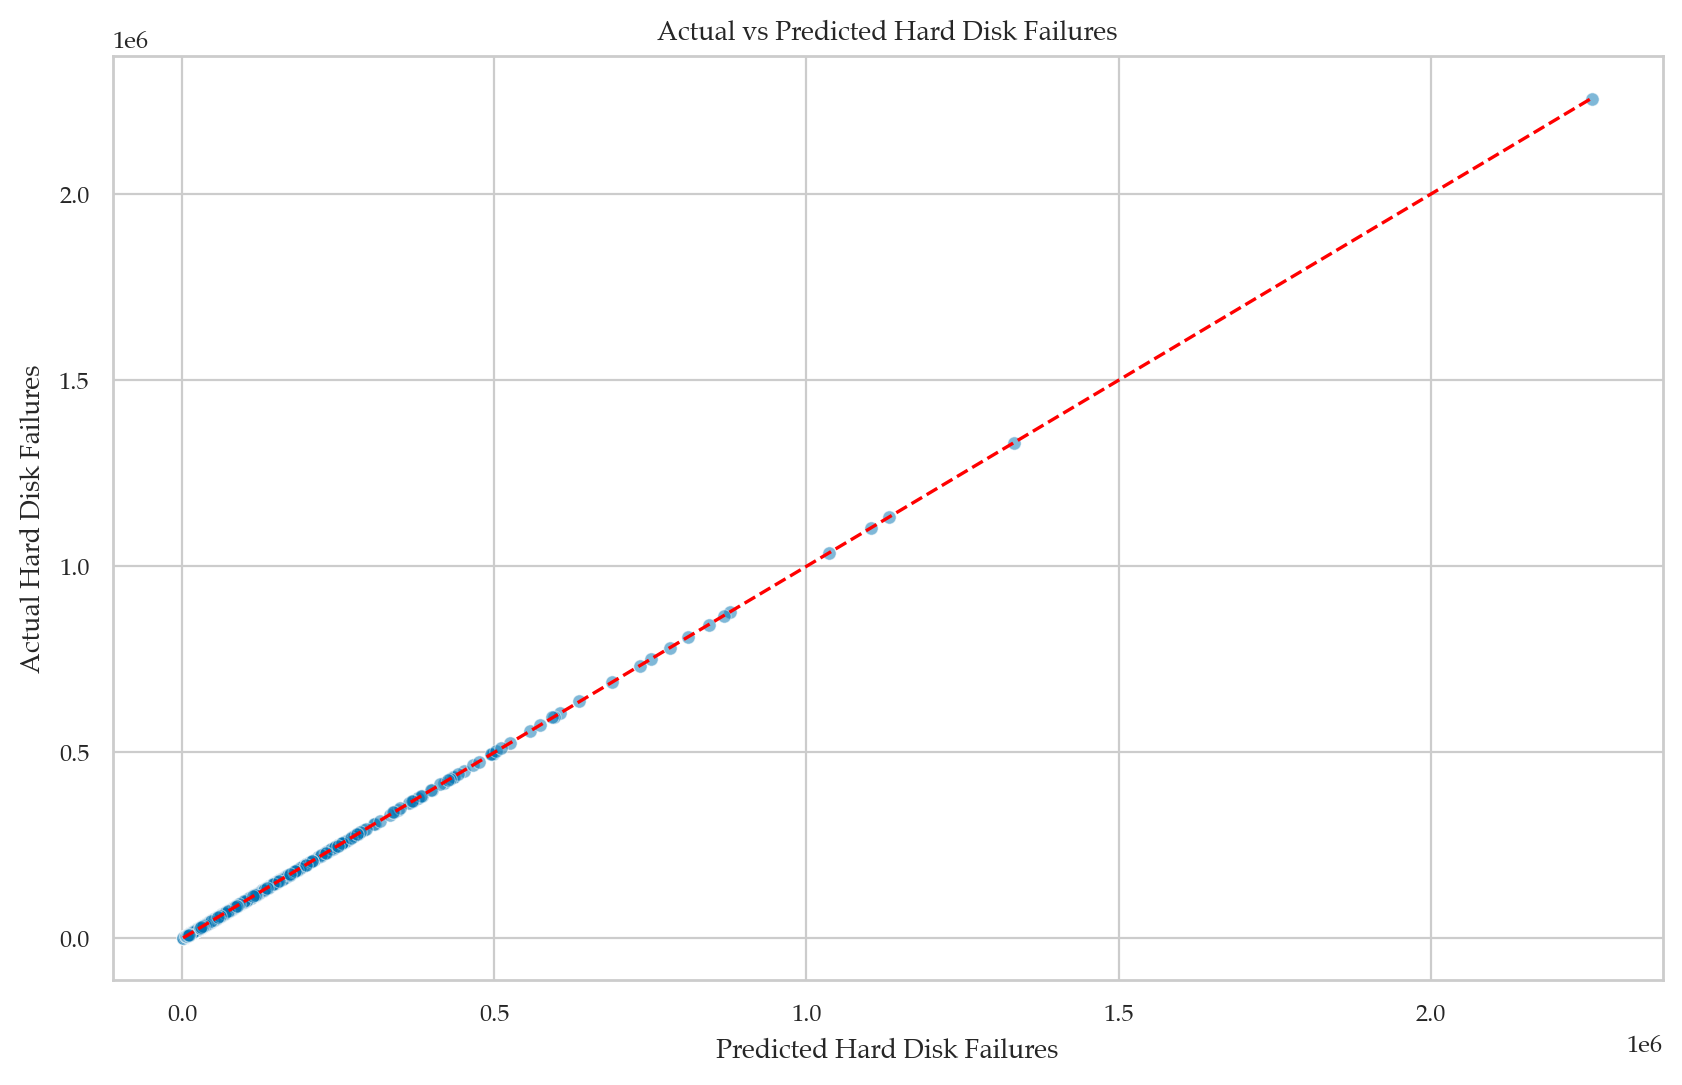

In [11]:
# Plot 1: Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['predicted_failures'], y=df['hard_disk_failures'], alpha=0.5)
plt.plot([df['predicted_failures'].min(), df['predicted_failures'].max()], 
         [df['predicted_failures'].min(), df['predicted_failures'].max()], 
         color='red', linestyle='--')
plt.xlabel('Predicted Hard Disk Failures')
plt.ylabel('Actual Hard Disk Failures')
plt.title('Actual vs Predicted Hard Disk Failures')
plt.show()

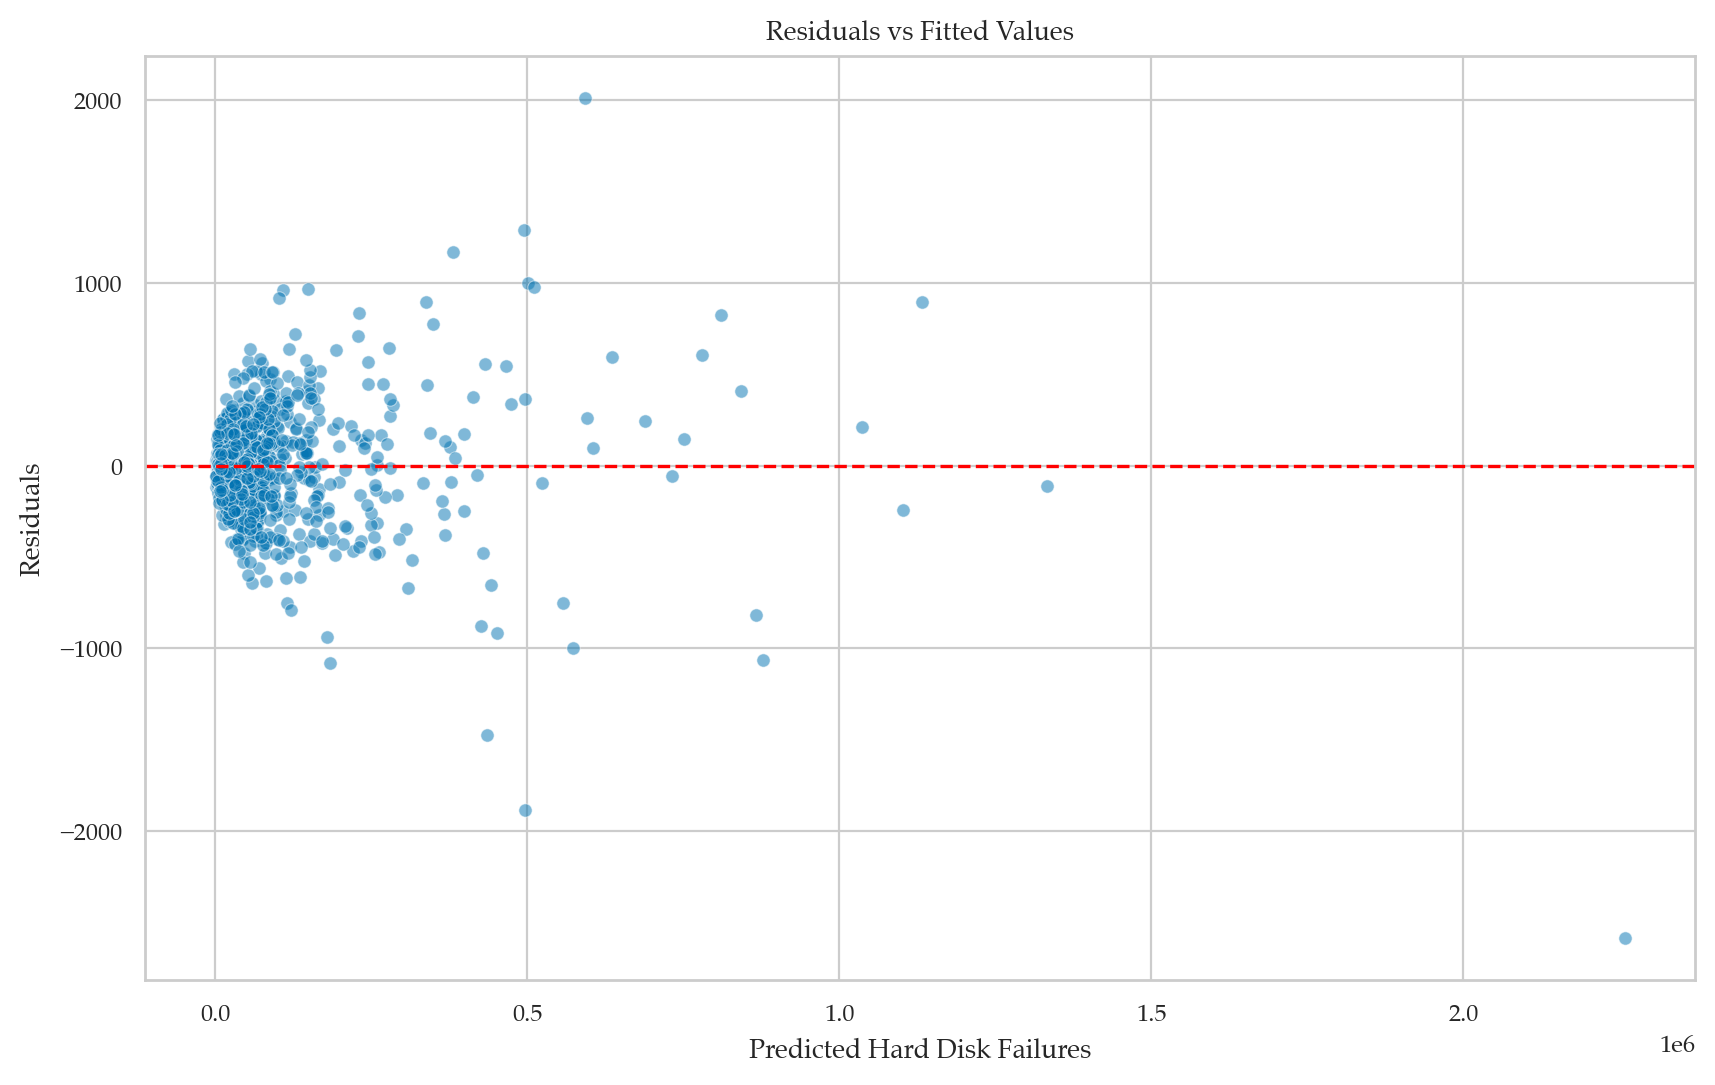

In [12]:

# Plot 2: Residuals vs Fitted
residuals = df['hard_disk_failures'] - df['predicted_failures']
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['predicted_failures'], y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Hard Disk Failures')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

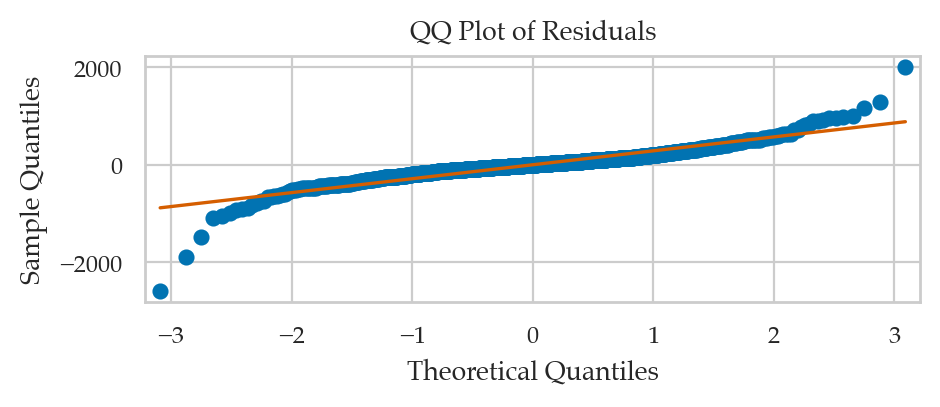

In [44]:
# Plot 3: QQ plot of residuals
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

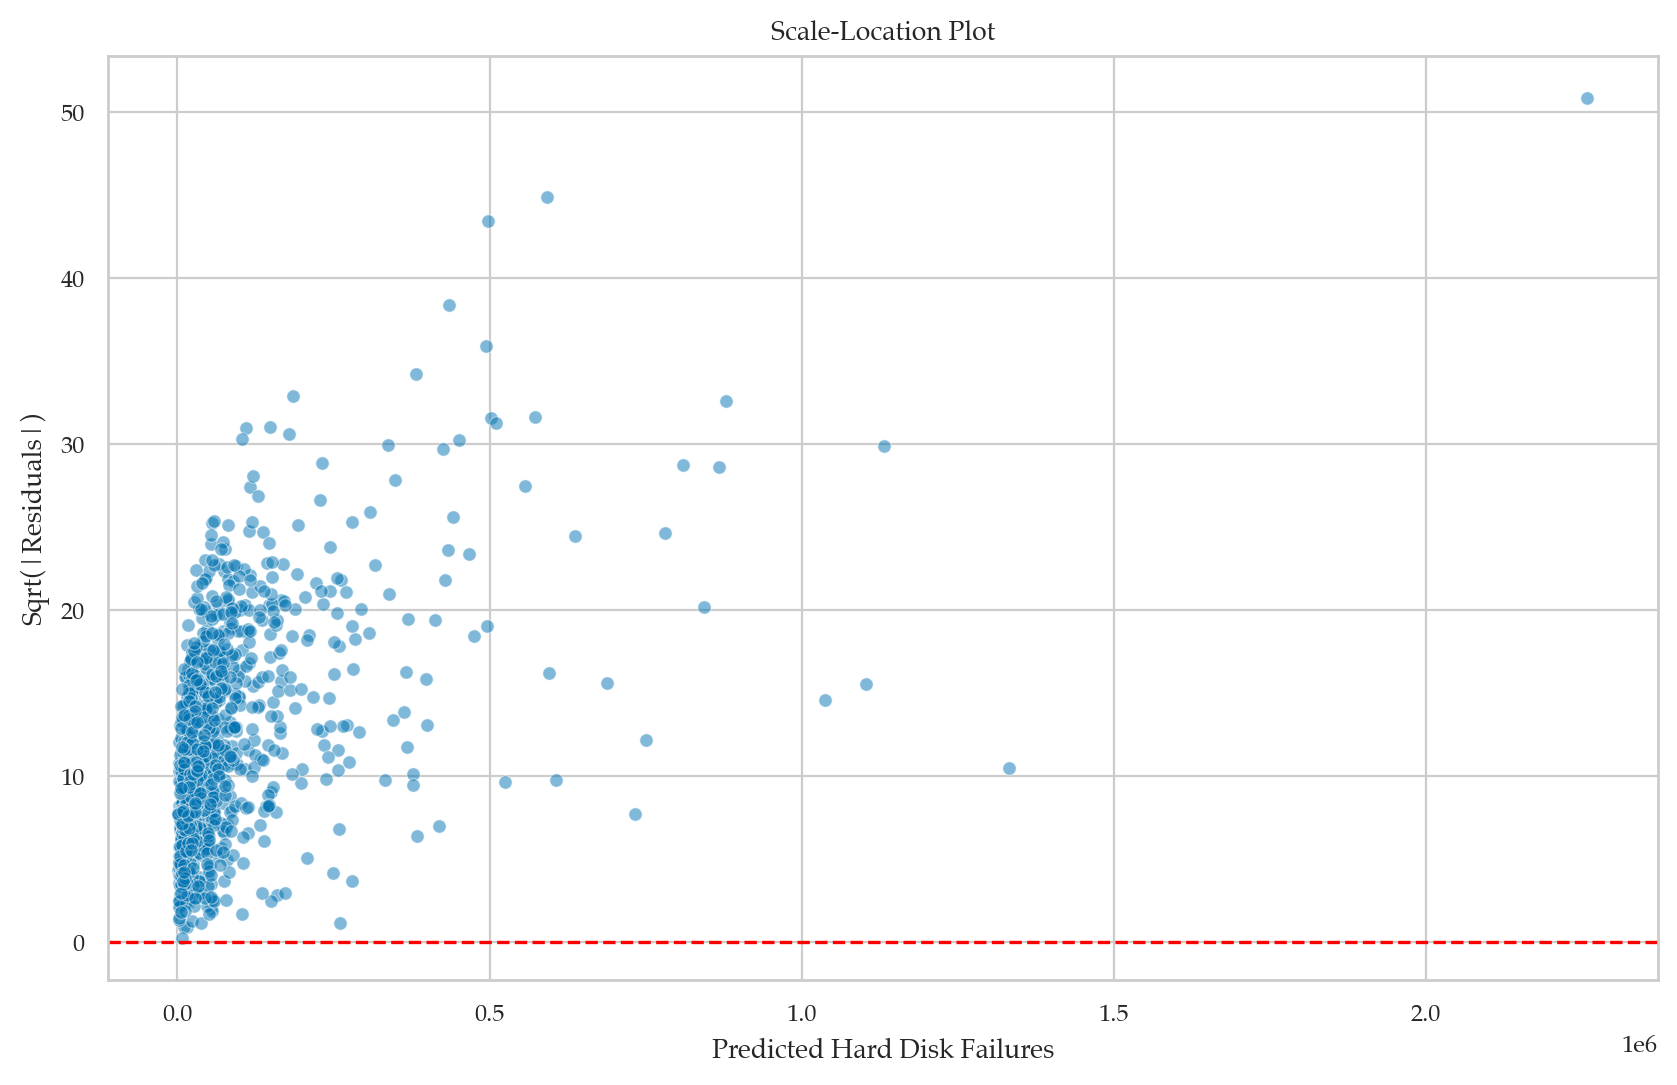

In [14]:

# Plot 4: Scale-Location plot (Spread-Location plot)
sqrt_abs_residuals = np.sqrt(np.abs(residuals))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['predicted_failures'], y=sqrt_abs_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Hard Disk Failures')
plt.ylabel('Sqrt(|Residuals|)')
plt.title('Scale-Location Plot')
plt.show()

## Extra examples

### Example N: student admissions

In [15]:
# data = whether students got admitted (admit=1) or not (admit=0) based on their gre and gpa scores, and the rank of their instutution
# raw_data = pd.read_csv('https://stats.idre.ucla.edu/stat/data/binary.csv')
binary = pd.read_csv('./explorations/data/binary.csv')
binary.head(3)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1


In [16]:
pd.crosstab(
    binary['admit'],
    binary['rank'], 
    margins = False
)

rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


In [17]:
lrbin = smf.logit('admit ~ gre + gpa + C(rank)', data=binary).fit()
lrbin.params
# lrbin.summary()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


Intercept      -3.989979
C(rank)[T.2]   -0.675443
C(rank)[T.3]   -1.340204
C(rank)[T.4]   -1.551464
gre             0.002264
gpa             0.804038
dtype: float64

The above model uses the rank=1 as the reference category an the log odds reported are with respect to this catrgory

$$
   log p(accept|rank=1) / log p(accept|rank=2) = rank[T.2] = -0.675443
$$

etc. for others
rank[T.3] 	-1.340204
rank[T.4] 	-1.551464


See [LogisticRegressionChangeOfReferenceCategoricalValue.ipynb](./explorations/LogisticRegressionChangeOfReferenceCategoricalValue.ipynb) for exercise recodign relative to different refrence level.


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

X = binary.drop("admit", axis=1)
y = binary["admit"]


transformer = [
    ('ohe', 
    OneHotEncoder(drop = 'first', 
                  handle_unknown = 'ignore', 
                  sparse_output = False), 
    ["rank"]),
]
preprocessor = ColumnTransformer(
    transformers = transformer, 
    remainder = 'passthrough', 
).set_output(transform='pandas')

X_prep = preprocessor.fit_transform(X)


lr = LogisticRegression(solver="lbfgs", penalty=None, max_iter=1000)
lr.fit(X_prep.to_numpy(dtype=np.float32), y)
lr.intercept_,  lr.coef_


(array([-3.99021277]),
 array([[-0.67551587, -1.34051977, -1.55172341,  0.0022647 ,  0.80409866]]))

## Titanic

cf. [Titanic_Logistic_Regression.ipynb](./explorations/Titanic_Logistic_Regression.ipynb)

In [22]:

titanic = pd.read_csv('./explorations/data/titanic.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [34]:
df = titanic[['Survived', 'Age', 'Sex', 'Pclass']]
df = pd.get_dummies(df, columns=['Sex', 'Pclass'], drop_first=True)
df.dropna(inplace=True)
df.head()



,Survived,Age,Sex_male,Pclass_2,Pclass_3
0,0,22.0,True,False,True
1,1,38.0,False,False,False
2,1,26.0,False,False,True
3,1,35.0,False,False,False
4,0,35.0,True,False,True


In [35]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty=None)
titresult = model.fit(X, y)

In [37]:
titresult.intercept_, titresult.coef_

(array([3.77702703]),
 array([[-0.03698571, -2.52276365, -1.30981349, -2.58063585]]))

In [40]:
lrtit = smf.logit("Survived ~ Age + Sex_male + Pclass_2 + Pclass_3", data=df).fit()
lrtit.params

Optimization terminated successfully.
         Current function value: 0.453279
         Iterations 6


Intercept           3.777013
Sex_male[T.True]   -2.522781
Pclass_2[T.True]   -1.309799
Pclass_3[T.True]   -2.580625
Age                -0.036985
dtype: float64